# 1: UNDERSTANDING THE PROBLEM STATEMENT AND BUSINESS CASE

<h2><b><i>THE GOAL OF THIS PROJECT IS TO ANALYZE AND PREDICT CUSTOMERS REVIEWS ON FAMOUS AMAZON ALEXA DEVICE TO SEE WHETHER THE CUSTOMERS ARE SATISFIED FROM THE PRODUCT OR NOT BASED ON THEIR REVIEWS.<i><b></h2>

# 2: IMPORTING LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science for Business/5. Public Relations Department/amazon_alexa.tsv', sep='\t')

In [ ]:
reviews_df

In [ ]:
reviews_df.info()

In [ ]:
reviews_df.describe()

In [ ]:
reviews_df['verified_reviews']

# 3: EXPLORING DATASET

In [ ]:
sns.heatmap(reviews_df.isnull(),cbar=False, yticklabels=False,cmap="Blues")

In [ ]:

reviews_df.isnull().sum()

In [ ]:
reviews_df.hist(bins=30 , figsize=(15,5), color= "r")

In [ ]:
reviews_df["length"] = reviews_df['verified_reviews'].apply(len)

In [ ]:
reviews_df

In [ ]:

reviews_df["length"].hist(bins= 100,figsize=(10,5), color = "r")

In [ ]:
reviews_df["length"].describe()

In [ ]:
#longest review
reviews_df[reviews_df["length"]==2851.0]

In [ ]:
reviews_df[reviews_df["length"]==2851.0]["verified_reviews"].iloc[0]

In [ ]:
#shortest review
reviews_df[reviews_df["length"]==1.0]["verified_reviews"].iloc[0]

In [ ]:
reviews_df

In [ ]:
positive = reviews_df[reviews_df['feedback']==1]

In [ ]:
negative = reviews_df[reviews_df['feedback']==0]

In [ ]:
print(len(positive),len(negative))

In [ ]:
sns.countplot(reviews_df["feedback"] , label = "count")

In [ ]:
sns.countplot(reviews_df["rating"] , label = "count")

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x="variation", y = "rating" , data = reviews_df , palette = "deep")

In [ ]:
sentences = reviews_df['verified_reviews'].tolist()
sentences

In [ ]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

In [ ]:
len(sentences_as_one_string)

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
neg_sentences = negative['verified_reviews'].tolist()
neg_sentences

In [ ]:
neg_sentences_as_one_string = " ".join(neg_sentences)
neg_sentences

In [ ]:
len(neg_sentences_as_one_string)

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))

# 4: PERFORMING DATA CLEANING

In [ ]:
reviews_df.head()

In [ ]:
reviews_df.corr()

AttributeError: ignored

In [ ]:
reviews_df = reviews_df.drop(["rating","date","length"] , axis= 1)



In [ ]:
reviews_df["verified_reviews"]

In [ ]:
from textattack.augmentation import EmbeddingAugmenter
augmenter = EmbeddingAugmenter()



In [ ]:
reviews_df

In [ ]:
variation_dummies = pd.get_dummies(reviews_df['variation'] , drop_first= True)


In [ ]:
variation_dummies

In [ ]:
reviews_df.drop(["variation"] , axis= 1 , inplace= True)

In [ ]:
reviews_df = pd.concat([reviews_df,variation_dummies] , axis =1)

In [ ]:
reviews_df

# 5: HOW TO REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

In [ ]:
Test_pun_removed = []

In [ ]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'
for i in Test:
  if i not in string.punctuation:
    Test_pun_removed.append(i)

In [ ]:
Test_pun_removed

In [ ]:
Test_pun_removed_join = "".join(Test_pun_removed)

In [ ]:
Test_pun_removed_join

# 6: HOW TO REMOVE STOPWORDS

In [ ]:
import nltk
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

In [ ]:
Test_pun_removed_join_clean = [word for word in Test_pun_removed_join.split()  if word.lower() not in stopwords.words("english") ]

In [ ]:
  Test_pun_removed_join_clean

# 7: HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

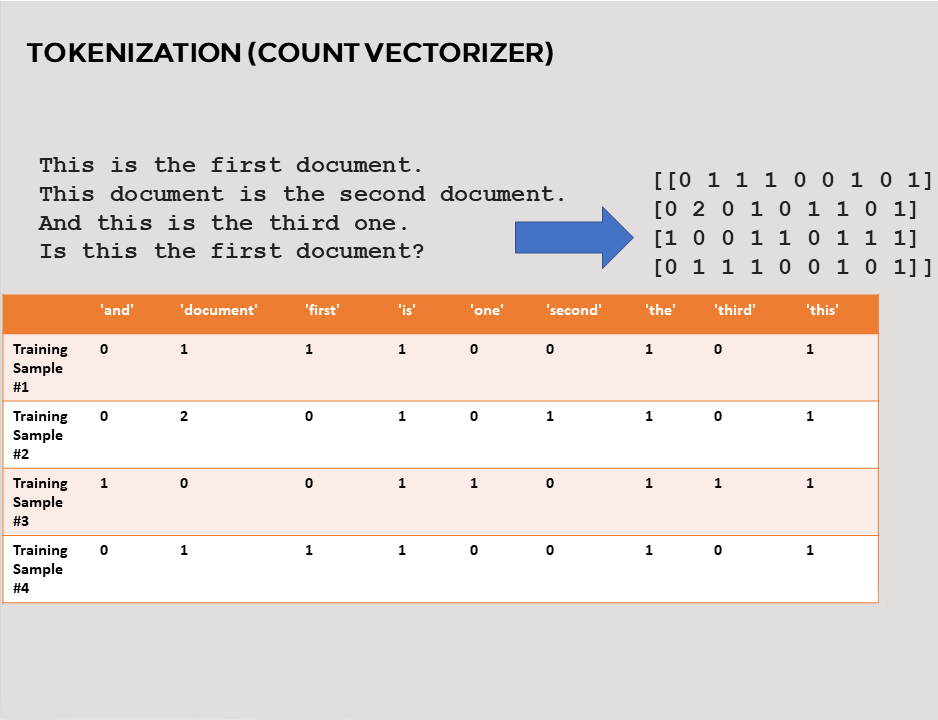

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(X.toarray())

# 8: DATA CLEANING  !!!

In [ ]:
reviews_df['verified_reviews']

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean



In [ ]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)


In [ ]:
print(reviews_df_clean[3]) # show the cleaned up version

In [ ]:
print(reviews_df['verified_reviews'][3]) # show the original version

In [ ]:
reviews_df_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(reviews_countvectorizer.toarray())

In [ ]:
reviews_countvectorizer.shape

In [ ]:
reviews_df

In [ ]:
# first let's drop the column
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [ ]:
# Now let's concatenate them together
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [ ]:
reviews_df

In [ ]:
# Let's drop the target label coloumns
X = reviews_df.drop(['feedback'],axis=1)

In [ ]:
X

In [ ]:
y = reviews_df['feedback']

# 9: THEORY AND INTUITION BEHIND NAIVE BAYES

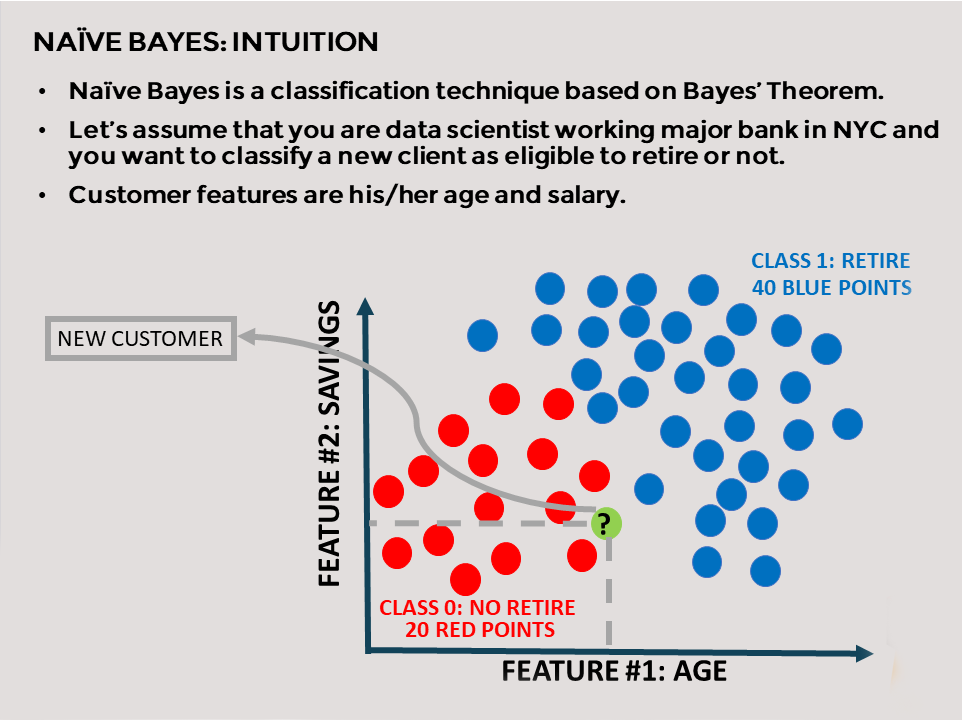

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# 10: TRAINING A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# 11: ASSESSING TRAINED MODEL PERFORMANCE  

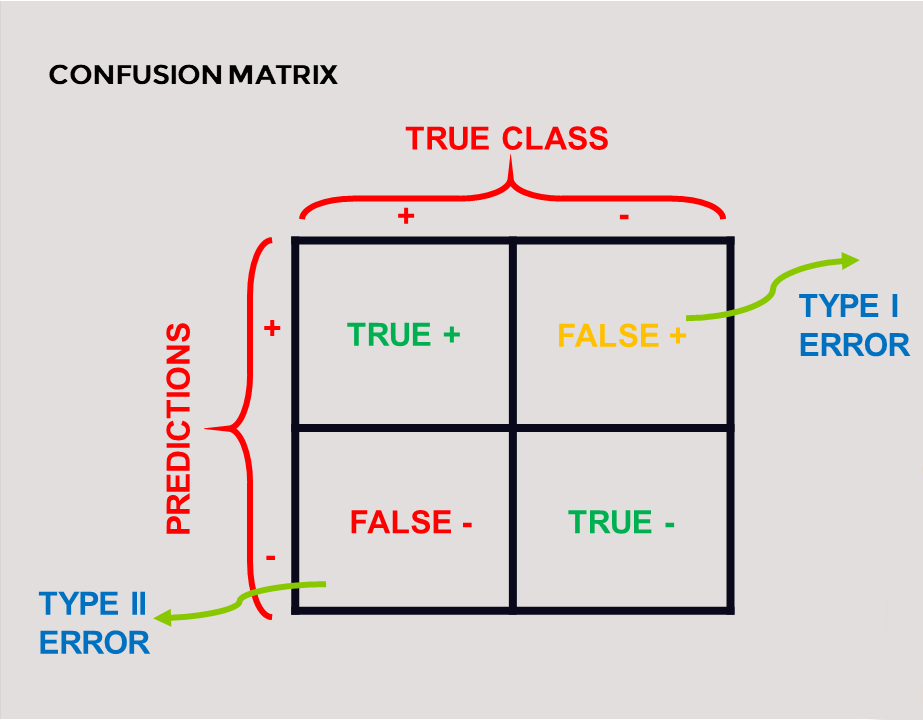

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

# 12: TRAINING AND EVALUATING A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Testing Set Performance
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format( 100 * accuracy_score(y_pred, y_test)))

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

CONCLUSION : LOGISTIC REGRESSION IS WORKING BETTER THAN NAIVE BAYES ALGORITHM FOR OUR PROJECT TASK..!!

# THANK YOU !!!
   Q AND A???